In [24]:
# Import main libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries needed for reading image and processing it
import csv
from PIL import Image
from scipy.ndimage import rotate

# Pretty display for notebooks
%matplotlib inline

In [3]:
X_train = pd.read_csv("/content/drive/MyDrive/Arabic_Handwriting/csvTrainImages.csv")
y_train = pd.read_csv("/content/drive/MyDrive/Arabic_Handwriting/csvTrainLabel.csv")
X_test = pd.read_csv("/content/drive/MyDrive/Arabic_Handwriting/csvTestImages.csv")
y_test = pd.read_csv("/content/drive/MyDrive/Arabic_Handwriting/csvTestLabel.csv")

Convert csv values to an image

In [8]:
# def convert_values_to_image(image_values, display=False):
#   image_array = np.asarray(image_values)
#   image_array = image_array.reshape(64, 64).astype('uint8')
#   # The original dataset is reflected so we will flip it then rotate for a better view only.
#   image_array = np.flip(image_array, 0)
#   image_array = rotate(image_array, -90)
#   new_image = Image.fromarray(image_array)
#   if display == True:
#     new_image.show()
#   return new_image

In [10]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()-1

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()-1

In [11]:
X_train = X_train.reshape(-1,32,32)
X_test = X_test.reshape(-1,32,32)

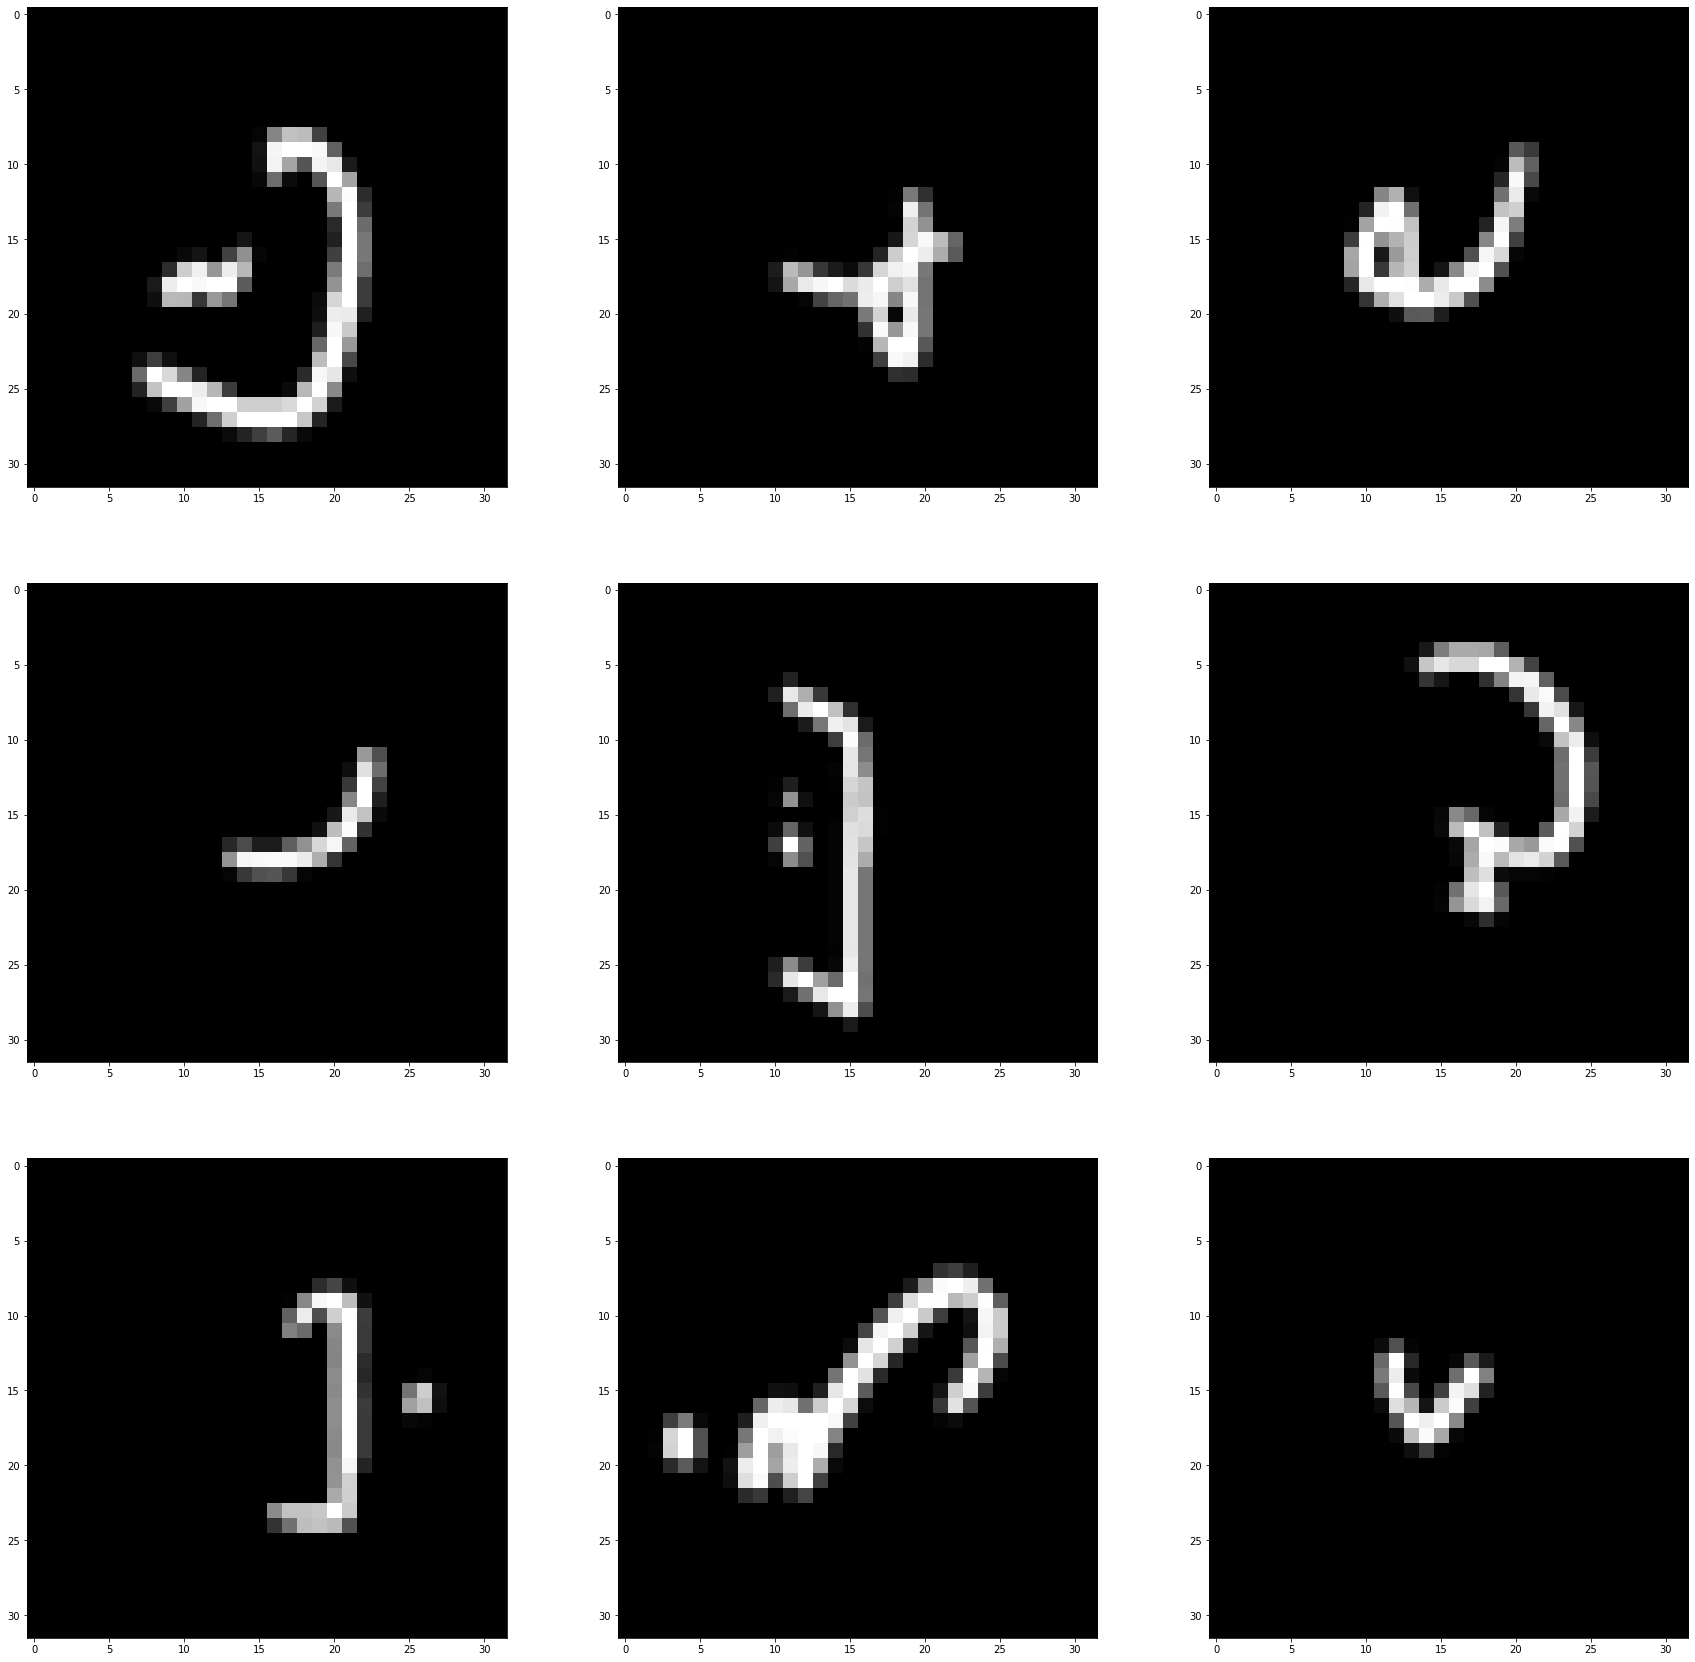

In [20]:
fig, ax = plt.subplots(3,3, figsize = (30,30))

for i in range(3):
    for j in range(3):
        ax[i,j].imshow(X_train[np.random.randint(0,X_train.shape[0])],"gray")

In [15]:
X_train = X_train/255
X_test = X_test/255

pour une raison quelconque, les images sont retournées et tournées, donc nous transposons chaque image pour qu'elle soit dans la bonne forme

In [21]:
X_train = np.array([image.T for image in X_train])
X_test = np.array([image.T for image in X_test])

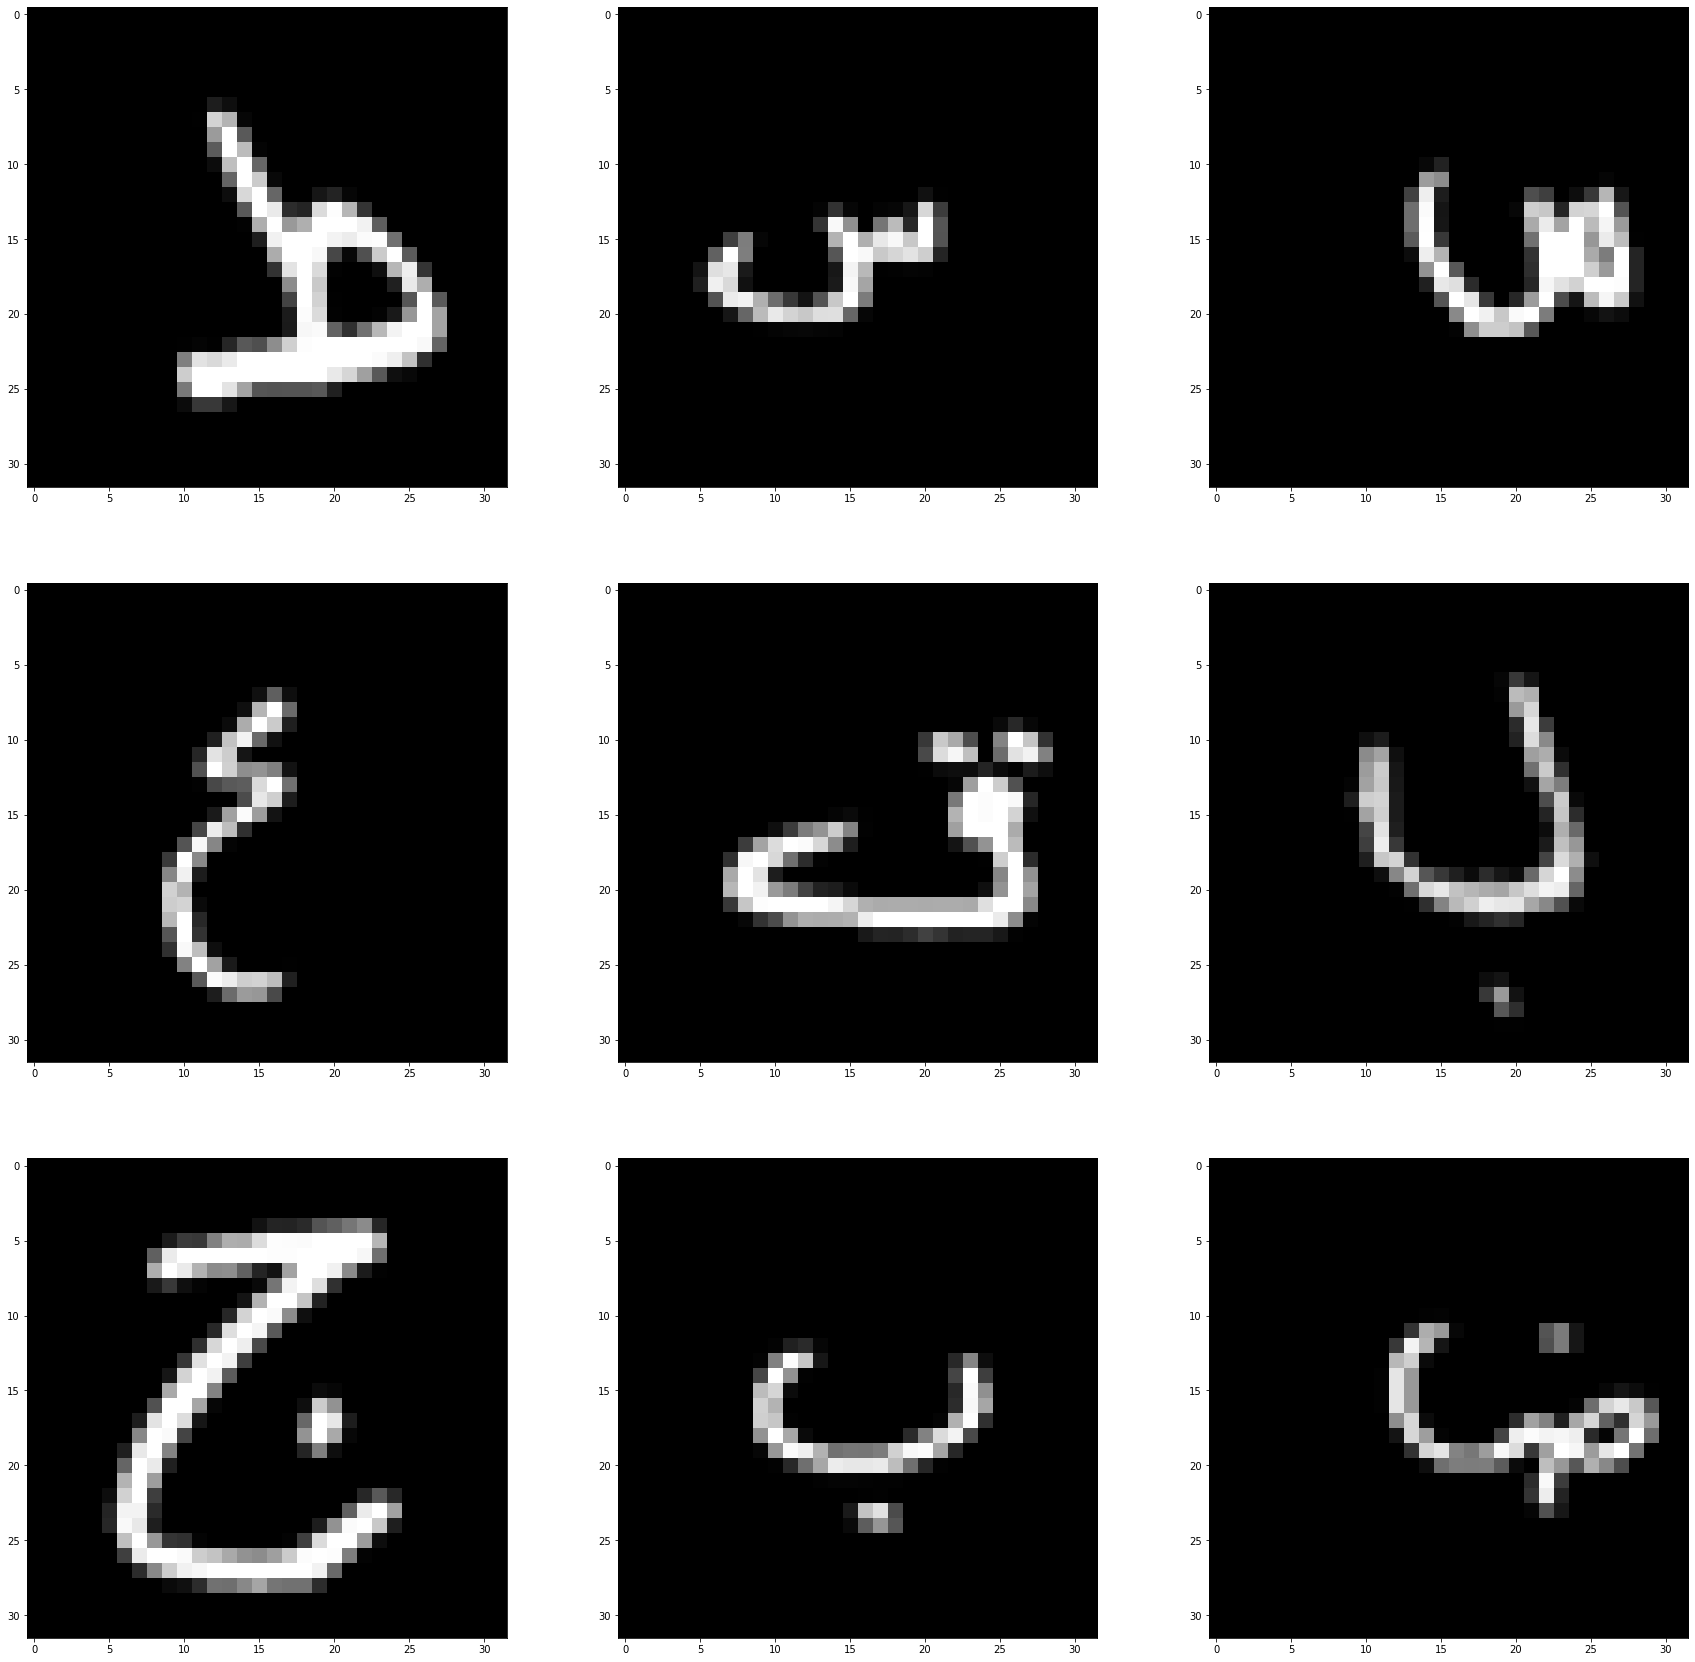

In [22]:
fig, ax = plt.subplots(3,3, figsize = (30,30))

for i in range(3):
    for j in range(3):
        ax[i,j].imshow(X_train[np.random.randint(0,X_train.shape[0])],"gray")

In [25]:
# shuffle
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

print(X_train.shape, X_test.shape)

(13439, 32, 32) (3359, 32, 32)


IndexError: ignored

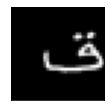

In [30]:
# set the arabic alphabet
arabic_chars =list('مهدي')
arabic_chars

ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[ra[i]].reshape(32,32),"gray")
    plt.title(arabic_chars[int(y_train[ra[i]][0])], fontsize = 20)
plt.show()

Model

In [87]:
#Converting the labels into one hot encoding
from keras.utils import to_categorical 
y_train = to_categorical(y_train, 28)
y_test = to_categorical(y_test, 28)

In [88]:
X_train = X_train.reshape(-1,32,32, 1)
X_test = X_test.reshape(-1,32,32, 1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(13439, 32, 32, 1) (3359, 32, 32, 1)
(13439, 28) (3359, 28)


In [89]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(28, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 conv2d_51 (Conv2D)          (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_45 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_52 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_53 (Conv2D)          (None, 8, 8, 64)          36928     
                                                     

In [91]:
# Training the model
model_fit = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
420/420 [==============================] - 72s 168ms/step - loss: 2.0599 - accuracy: 0.3639 - val_loss: 0.8760 - val_accuracy: 0.7291
Epoch 2/15
420/420 [==============================] - 71s 168ms/step - loss: 0.9645 - accuracy: 0.6751 - val_loss: 0.5653 - val_accuracy: 0.8255
Epoch 3/15
420/420 [==============================] - 70s 166ms/step - loss: 0.6386 - accuracy: 0.7871 - val_loss: 0.3520 - val_accuracy: 0.8833
Epoch 4/15
420/420 [==============================] - 72s 172ms/step - loss: 0.4740 - accuracy: 0.8436 - val_loss: 0.2663 - val_accuracy: 0.9149
Epoch 5/15
420/420 [==============================] - 70s 166ms/step - loss: 0.3772 - accuracy: 0.8760 - val_loss: 0.2110 - val_accuracy: 0.9351
Epoch 6/15
420/420 [==============================] - 70s 166ms/step - loss: 0.3167 - accuracy: 0.8969 - val_loss: 0.2198 - val_accuracy: 0.9294
Epoch 7/15
420/420 [==============================] - 70s 166ms/step - loss: 0.2680 - accuracy: 0.9113 - val_loss: 0.1650 - val_ac

[0.3638663589954376, 0.6751246452331543, 0.7871121168136597, 0.8435895442962646, 0.8759580254554749, 0.8968673348426819, 0.911302924156189, 0.9219436049461365, 0.9326586723327637, 0.9394299983978271, 0.9412902593612671, 0.948880136013031, 0.9499218463897705, 0.9529727101325989, 0.9583302140235901]


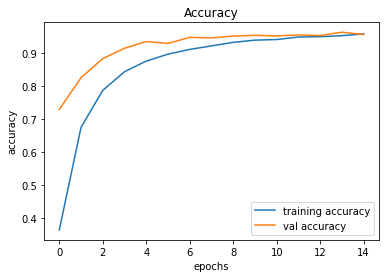

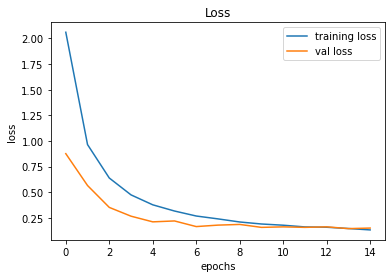

In [112]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(model_fit.history['accuracy'], label='training accuracy')
plt.plot(model_fit.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(model_fit.history['loss'], label='training loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [93]:
model.save('/content/drive/MyDrive/Arabic_Handwriting/arabic_handwritten.h5') #to save